In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.manifold import MDS
from sklearn.cluster import KMeans

In [2]:
def readJavaArray(dataset, Type):
    f0 = "PFGAP/Results/" + Type + "/" + dataset + "_" + Type + ".txt"
    f1 = open(f0)
    f2 = f1.read()
    f2 = f2.replace("{","[")
    f2 = f2.replace("}","]")
    #exec("Arr = np.array(" + f2 + ")")
    Arr = eval("np.array(" + f2 + ")")
    return Arr

In [3]:
Pmat = readJavaArray("ArrowHead", "Proximities")
y_train = readJavaArray("ArrowHead", "ytrain")

In [4]:
PMat = (Pmat + Pmat.transpose())/2
Dis = np.ones(PMat.shape) - PMat

In [5]:
embedding = MDS(n_components=2, metric=True, dissimilarity='precomputed', random_state=0)
X_transformed = embedding.fit_transform(Dis)

In [6]:
X1 = np.array([X_transformed[i] for i in range(X_transformed.shape[0]) if y_train[i]==1]).transpose()
X2 = np.array([X_transformed[i] for i in range(X_transformed.shape[0]) if y_train[i]==2]).transpose()
X0 = np.array([X_transformed[i] for i in range(X_transformed.shape[0]) if y_train[i]==0]).transpose()
eX = [X0,X1,X2]

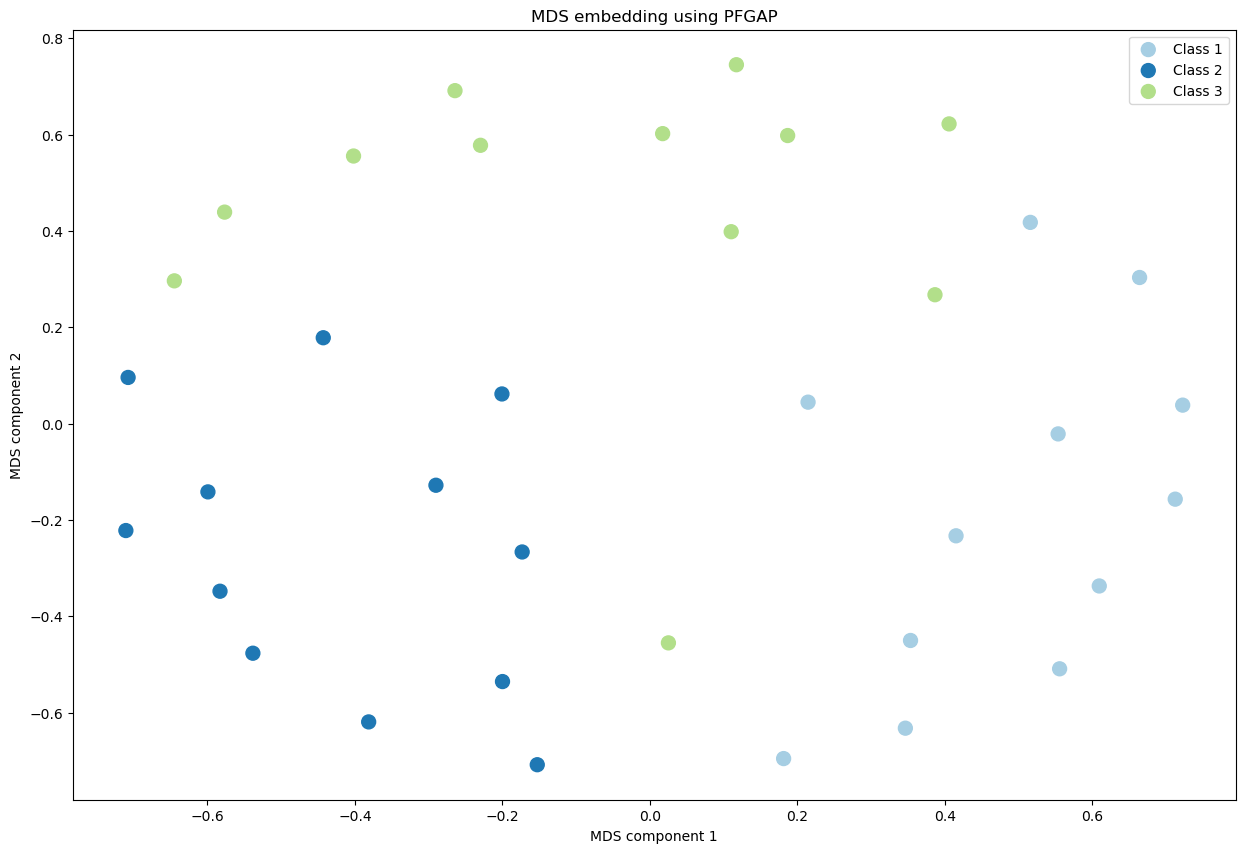

In [14]:
cmap = plt.cm.Paired
plt.figure(figsize = (15,10))
for i in range(1,4):
    plt.scatter(eX[i-1][0], eX[i-1][1], s=100, c=cmap([i-1 for j in range(eX[i-1].shape[1])]), 
                label="Class {:g}".format(i))
    
    #plt.savefig("ArrowHead_PFGAP.pdf")
    
plt.legend()
plt.xlabel('MDS component 1')
plt.ylabel('MDS component 2')
plt.title('MDS embedding using PFGAP')
plt.show()
#plt.savefig("ArrowHead_PFGAP.pdf")

In [ ]:
KM = KMeans(n_clusters=3, random_state=0)
kmeans = KM.fit(X_transformed)
y_preds = KM.predict(X_transformed)

In [ ]:
y_preds

In [ ]:
y_train

In [ ]:
#switch 1 and 0, keep 2 fixed. there's an easier way, but why? :)
y_preds = np.array([3/2*y**2 - 5/2*y+1 for y in y_preds])

In [ ]:
# Here's the kmeans accuracy.
rights = [1 for i in range(len(y_train)) if y_train[i]==y_preds[i]]
score = sum(rights)/len(y_train)
print(score)